<a href="https://colab.research.google.com/github/Buchi1996/Spaceship-Titanic/blob/main/Kaggle_space_ship_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from google.colab import files
import io

In [3]:
#uploaded = files.upload()
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [8]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
#Getting the passenger ID as an array
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled = sc.fit_transform(train_data)
test_scaled = sc.fit_transform(test_data)
'''
test_data.iloc[:,0]

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [11]:
#getting the transported column as an array
train_data.iloc[:,13]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [12]:
#label encoder to transform the label object data to numerical
from sklearn.preprocessing import LabelEncoder
label = train_data["Transported"]
l = LabelEncoder()
le = l.fit_transform(label)

In [13]:
le

array([0, 1, 0, ..., 1, 0, 1])

In [14]:
le.dtype

dtype('int64')

In [15]:
#Exploratory Analysis
#check for missing/null values
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
#handling the null values
#filling the null values with median values
#replace with median for float64 and replace with mode for object 

#HomePlanet      201
HomePlanet=train_data['HomePlanet'].mode()
train_data['HomePlanet'].fillna(value=HomePlanet[0], inplace=True)

#CryoSleep       217
CryoSleep = train_data['CryoSleep'].mode()
train_data['CryoSleep'].fillna(value=CryoSleep[0], inplace=True)

#Destination     182
Destination = train_data['Destination'].mode()
train_data['Destination'].fillna(value=Destination[0], inplace=True)

#Cabin       199
Cabin = train_data['Cabin'].mode()
train_data['Cabin'].fillna(value=Cabin[0], inplace=True)

#Age             179
Age_med = train_data['Age'].median()
train_data['Age'].fillna(value=Age_med, inplace=True)

#VIP             203
VIP = train_data['VIP'].mode()
train_data['VIP'].fillna(value=VIP[0], inplace=True)

#RoomService     181
RoomService_med = train_data['RoomService'].median()
train_data['RoomService'].fillna(value=RoomService_med, inplace=True)

#FoodCourt       183
FoodCourt_med = train_data['FoodCourt'].median()
train_data['FoodCourt'].fillna(value=FoodCourt_med, inplace=True)

#ShoppingMall    208
ShoppingMall_med = train_data['ShoppingMall'].median()
train_data['ShoppingMall'].fillna(value=ShoppingMall_med, inplace=True)

#Spa             183
Spa_med = train_data['Spa'].median()
train_data['Spa'].fillna(value=Spa_med, inplace=True)

#VRDeck          188
VRDeck_med = train_data['VRDeck'].median()
train_data['VRDeck'].fillna(value=VRDeck_med, inplace=True)

#Name           200
Name = train_data['Name'].mode()
train_data['Name'].fillna(value=Name[0], inplace=True)


In [17]:
#train
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [18]:
#checking for unique values
print(train_data['HomePlanet'].unique())
print(train_data['CryoSleep'].unique())
print(train_data['Cabin'].unique())
print(train_data['Destination'].unique())
print(train_data['VIP'].unique())
print(train_data['RoomService'].unique())
print(train_data['FoodCourt'].unique())
print(train_data['ShoppingMall'].unique())
print(train_data['Spa'].unique())
print(train_data['VRDeck'].unique())
print(train_data['Transported'].unique())
print(train_data['Name'].unique())

['Europa' 'Earth' 'Mars']
[False  True]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False  True]
[   0.  109.   43. ... 1569. 8586.  745.]
[   0.    9. 3576. ... 3208. 6819. 4688.]
[   0.   25.  371. ... 1085.  510. 1872.]
[   0.  549. 6715. ... 2868. 1107. 1643.]
[   0.   44.   49. ... 1164.  971. 3235.]
[False  True]
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [19]:
#columns of train_data as a list
print(train_data.columns.tolist())

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


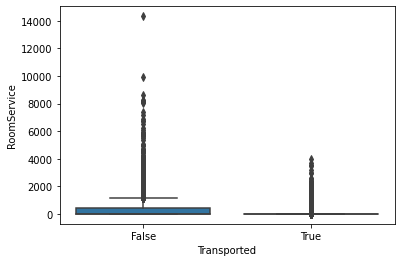

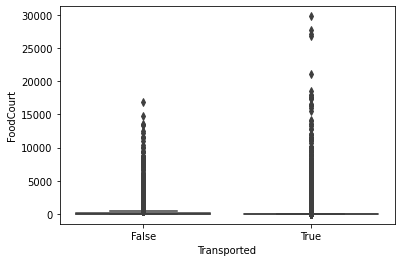

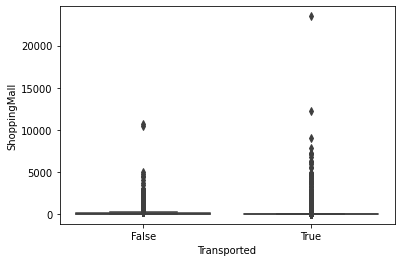

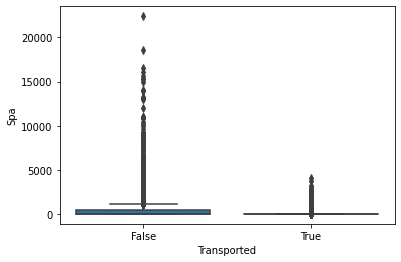

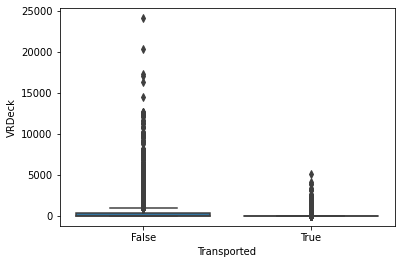

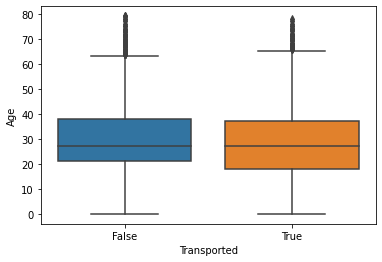

In [20]:
#get a the column names into a list
categorical_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numeric_variables = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age']
#for each of the categorical_variables
for variable in numeric_variables:
    #ax = sns.histplot(data=train, x=variable, hue='Transported', kde=True)
    sns.boxplot(data=train_data, x='Transported', y=variable)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


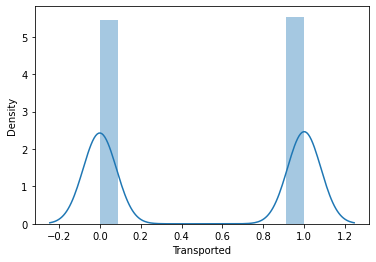

In [21]:
#plotting the target variable to see characteristics
sns.distplot(train_data["Transported"])

In [22]:
#using Counter() to count the  percentage of class of 0 and 1 (transported and not transported)
from collections import Counter
Counter = Counter(train_data.Transported)
for k,v in Counter.items():
  p = v / len(train_data.Transported)* 100
  print("class{}".format(k), "Count{}".format(v), "p:%.2f" %p)


classFalse Count4315 p:49.64
classTrue Count4378 p:50.36


In [23]:
#Get numerical values for all the categorical data (for now no dummy variables)
#Transported --> Target Variable
#train_data['Transported'] = train_data['Transported'].astype(str)
Transported_dict1 = dict(enumerate(train_data['Transported'].unique()))
Transported_dict = dict((v,k) for k,v in Transported_dict1.items())
train_data['Transported'] = train_data['Transported'].replace(Transported_dict)

#HomePlanet      201
#dictionary of all homeplanets:
HomePlanet_dict1 = dict(enumerate(train_data['HomePlanet'].unique()))
HomePlanet_dict = dict((v,k) for k,v in HomePlanet_dict1.items())
train_data['HomePlanet'] = train_data['HomePlanet'].replace(HomePlanet_dict)

#CryoSleep       217
CryoSleep_dict1 = dict(enumerate(train_data['CryoSleep'].unique()))
CryoSleep_dict = dict((v,k) for k,v in CryoSleep_dict1.items())
train_data['CryoSleep'] = train_data['CryoSleep'].replace(CryoSleep_dict)

#Destination     182
Destination_dict1 = dict(enumerate(train_data['Destination'].unique()))
Destination_dict = dict((v,k) for k,v in Destination_dict1.items())
train_data['Destination'] = train_data['Destination'].replace(Destination_dict)

#VIP             203
VIP_dict1 = dict(enumerate(train_data['VIP'].unique()))
VIP_dict = dict((v,k) for k,v in VIP_dict1.items())
train_data['VIP'] = train_data['VIP'].replace(VIP_dict)



In [64]:
#dropping cabin due to its weird data type
train_data.drop([ 'Cabin'], axis=1, inplace=True)
#checking
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,0.0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,1.0
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,0.0
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,0.0
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,1.0


In [25]:
#checking created dictionaries
print(Transported_dict)
print(Transported_dict1)
print(Destination_dict)
print(Destination_dict1)
print(VIP_dict)
print(VIP_dict1)

{False: 0, True: 1}
{0: False, 1: True}
{'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}
{0: 'TRAPPIST-1e', 1: 'PSO J318.5-22', 2: '55 Cancri e'}
{False: 0, True: 1}
{0: False, 1: True}


In [26]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
train_data.Transported.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Transported, (1 = Transported)")  

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_data.Transported, train_data.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Transported by Age,  (1 = Transported)")

'''
ax3 = plt.subplot2grid((2,3),(0,2))
train_data.PassengerId.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_data.PassengerId.value_counts()))
plt.title("Class Distribution")
'''

ax3 = plt.subplot2grid((2,3),(0,2))
train_data.HomePlanet.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax3.set_xlim(-1, len(train_data.HomePlanet.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers location")

Text(0.5, 1.0, 'Passengers location')

Text(0.5, 1.0, 'Transport Breakdown (1 = Transported, 0 = Not Transported)')

<Figure size 432x288 with 0 Axes>

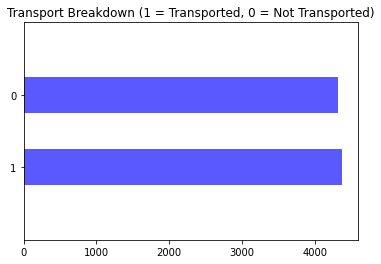

In [27]:
#transported vs not transported
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train_data.Transported.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train_data.Transported.value_counts())) 
plt.title("Transport Breakdown (1 = Transported, 0 = Not Transported)")

In [28]:
train_data.describe

<bound method NDFrame.describe of      PassengerId  HomePlanet  CryoSleep     Cabin  Destination   Age  VIP  \
0        0001_01           0          0     B/0/P            0  39.0    0   
1        0002_01           1          0     F/0/S            0  24.0    0   
2        0003_01           0          0     A/0/S            0  58.0    1   
3        0003_02           0          0     A/0/S            0  33.0    0   
4        0004_01           1          0     F/1/S            0  16.0    0   
...          ...         ...        ...       ...          ...   ...  ...   
8688     9276_01           0          0    A/98/P            2  41.0    1   
8689     9278_01           1          1  G/1499/S            1  18.0    0   
8690     9279_01           1          0  G/1500/S            0  26.0    0   
8691     9280_01           0          0   E/608/S            2  32.0    0   
8692     9280_02           0          0   E/608/S            0  44.0    0   

      RoomService  FoodCourt  ShoppingMal

In [30]:
y = train_data["Transported"]
y.shape

(8693,)

In [34]:
X_train = train_data.iloc[:,1:12]
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0
2,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0


In [66]:
#aplitting into to x and y and defining X_val and y_val
from sklearn.model_selection import train_test_split
X_train = train_data.iloc[:,1:11]
Y_train = train_data.iloc[:,12]
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#converting y_train to a 1D array
#y_train = y_train.flatten()

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((6954, 10), (6954,), (1739, 10), (1739,))

In [41]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#TEST dataset
test_data.shape

(4277, 13)

In [45]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [50]:
test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [47]:
#submission data set
Submission = test_data[['PassengerId']].copy()
Submission.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [51]:
#drop the passengerid, cabin, and name column because they won't be helpful to the models.
test_data.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [52]:
#Imputation - use medians and modes from TRAIN DATA not test..
#replace with median for float64 and replace with mode for object 

#HomePlanet      201
test_data['HomePlanet'].fillna(value=HomePlanet[0], inplace=True)
#CryoSleep       217
test_data['CryoSleep'].fillna(value=CryoSleep[0], inplace=True)
#Destination     182
test_data['Destination'].fillna(value=Destination[0], inplace=True)
#Age             179
test_data['Age'].fillna(value=Age_med, inplace=True)
#VIP             203
test_data['VIP'].fillna(value=VIP[0], inplace=True)
#RoomService     181
test_data['RoomService'].fillna(value=RoomService_med, inplace=True)
#FoodCourt       183
test_data['FoodCourt'].fillna(value=FoodCourt_med, inplace=True)
#ShoppingMall    208
test_data['ShoppingMall'].fillna(value=ShoppingMall_med, inplace=True)
#Spa             183
test_data['Spa'].fillna(value=Spa_med, inplace=True)
#VRDeck          188
test_data['VRDeck'].fillna(value=VRDeck_med, inplace=True)
#Deck    208


In [48]:
# because of 'not supported between instances of 'float' and 'str' '
train_data['Transported'] = train_data['Transported'].astype(float)
print(Transported_dict1)

# numerical values for all the categorical data (for now no dummy variables) 
#Cabin --> 199
Cabin_dict1 = dict(enumerate(train_data['Cabin'].unique()))
Cabin_dict = dict((v,k) for k,v in Cabin_dict1.items())
train_data['Cabin'] = train_data['Cabin'].replace(Cabin_dict)

#Name             200
Name_dict1 = dict(enumerate(np.sort(train_data['Name'].unique())))
Name_dict = dict((v,k) for k,v in Name_dict1.items())
train_data['Name'] = train_data['Name'].replace(Name_dict)

print(Name_dict1)
print(Name_dict)
print(Cabin_dict1)
print(Cabin_dict)

{0: False, 1: True}
{0: 'Aard Curle', 1: 'Aarjel Jaff', 2: 'Aarjel Rhuba', 3: 'Aark Ches', 4: 'Aark Homin', 5: 'Aarone Batestonley', 6: 'Aarone Burryerson', 7: 'Aarone Castannison', 8: 'Aarone Fowlaney', 9: 'Aarone Hoppers', 10: 'Aarone Lewintos', 11: 'Aarone Monroellynn', 12: 'Aarone Sweett', 13: 'Aars Pare', 14: 'Acceleb Rimplighty', 15: 'Acceleb Unrent', 16: 'Achah Cassiding', 17: 'Achah Stpingepid', 18: 'Achbah Emetillove', 19: 'Achbah Fansty', 20: 'Achbah Fueling', 21: 'Achib Heedry', 22: 'Achib Ingascomet', 23: 'Achib Pirejus', 24: 'Achib Unteckery', 25: 'Achira Capplid', 26: 'Achira Reewerpic', 27: 'Achira Uncionted', 28: 'Achira Unhaftimle', 29: 'Achiram Ainatint', 30: 'Achiram Prefule', 31: 'Achiram Turtertive', 32: 'Achium Alenter', 33: 'Achium Entratable', 34: 'Achium Inderad', 35: 'Achium Pokematic', 36: 'Achyon Nalanet', 37: 'Achyon Obedaming', 38: 'Achyon Ranaly', 39: 'Acraban Conamminal', 40: 'Acrabih Droning', 41: 'Acrabih Openduave', 42: 'Acrabik Hoorherve', 43: 'Acrab

In [53]:
test_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [55]:
#Get numerical values for all the categorical data (for now no dummy variables)
#Apply the dictionary mappings created in train.
#HomePlanet      
#dictionary of all homeplanets:
test_data['HomePlanet'] = test_data['HomePlanet'].replace(HomePlanet_dict)

#CryoSleep       
test_data['CryoSleep'] = test_data['CryoSleep'].replace(CryoSleep_dict)

#Destination     
test_data['Destination'] = test_data['Destination'].replace(Destination_dict)


test_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,0,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0,1,2,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0,0,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,1,0,0,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,1,1,0,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,1,0,0,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,2,1,2,27.0,False,0.0,0.0,0.0,0.0,0.0
4275,0,0,0,27.0,False,0.0,2680.0,0.0,0.0,523.0


In [67]:
#Using XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

#make predictions on validation data set
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)    


XGBClassifier()

In [68]:
#Tuning the Parameters for the XGBoost classifier
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
#Grid search
from sklearn.model_selection import GridSearchCV
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
g = grid_cv.fit(x_val, y_val)
g.best_score_

0.8628817080020932

In [69]:
#grid search best parameters
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [72]:
#final classifier using best parameters
xg_class1 = xgb.XGBClassifier(
    **grid_cv.best_params_)

xg_class1.fit(x_train, y_train)

y_pred_test = xg_class1.predict(x_val)
from sklearn.metrics import confusion_matrix
print("Testing accuracy: ", accuracy_score(y_val, y_pred_test))
print(confusion_matrix(y_val, y_pred_test))

Testing accuracy:  0.7791834387579069
[[630 233]
 [151 725]]


In [73]:
#SUBMISSION
Submission.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [76]:
#SUBMISSION file
Submission['Transported'] = xg_class1.predict(test_data)
Submission['Transported'] = Submission['Transported'].astype(bool)  #changing data type to boolean
Submission.to_csv("Submission.csv", index=False)  #creating a CSV
Submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [77]:
Submission.shape

(4277, 2)